In [285]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime

plt.rcParams['figure.figsize']=(30,20)
plt.rcParams['axes.labelsize']=20
plt.rcParams['axes.grid'] = False

In [286]:
data = pd.read_csv('C:/Users/ASUS/Documents/GitHub/antam-gold-forecasting/data/harga-emas-antam.csv')

In [287]:
data.head()

,Timestamp,Date,Gold Price
0,2010-01-04 09:07:00,2010-01-04,408000
1,2010-01-05 09:28:00,2010-01-05,410000
2,2010-01-06 07:01:00,2010-01-06,410000
3,2010-01-07 09:45:00,2010-01-07,412000
4,2010-01-08 09:37:00,2010-01-08,410000


In [288]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4289 entries, 0 to 4288
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Timestamp   4289 non-null   object
 1   Date        4289 non-null   object
 2   Gold Price  4289 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 100.6+ KB


,Gold Price
count,4.289000e+03
mean,7.289365e+05
std,2.126995e+05
min,3.940000e+05
25%,5.680000e+05
50%,6.390000e+05
75%,9.410000e+05
max,1.347000e+06


In [289]:
data['Date'] = pd.to_datetime(data['Date'])

# Check for duplicate rows based on both 'Date' and 'Gold Price' columns
duplicate_rows = data[data.duplicated(subset=['Date', 'Gold Price'], keep=False)]

# Print duplicate rows
print("Duplicate Rows:")
print(duplicate_rows)

# Remove duplicate rows based on both 'Date' and 'Gold Price' columns
data.drop_duplicates(subset=['Date', 'Gold Price'], keep='first', inplace=True)

# Print DataFrame after removing duplicates
print("\nDataFrame after removing duplicates:")
print(data)

Duplicate Rows:
                Timestamp       Date  Gold Price
62    2010-04-06 07:36:00 2010-04-06      399000
63    2010-04-06 09:23:00 2010-04-06      399000
87    2010-05-07 09:16:00 2010-05-07      422000
88    2010-05-07 13:16:00 2010-05-07      422000
128   2010-07-02 07:27:00 2010-07-02      417000
...                   ...        ...         ...
3989  2023-06-30 08:31:05 2023-06-30     1049000
3991  2023-07-03 08:10:00 2023-07-03     1054000
3992  2023-07-03 08:11:45 2023-07-03     1054000
4003  2023-07-14 08:11:23 2023-07-14     1080000
4004  2023-07-14 08:12:20 2023-07-14     1080000

[113 rows x 3 columns]

DataFrame after removing duplicates:
                Timestamp       Date  Gold Price
0     2010-01-04 09:07:00 2010-01-04      408000
1     2010-01-05 09:28:00 2010-01-05      410000
2     2010-01-06 07:01:00 2010-01-06      410000
3     2010-01-07 09:45:00 2010-01-07      412000
4     2010-01-08 09:37:00 2010-01-08      410000
...                   ...        ...    

In [290]:
import plotly.express as px

fig = px.line(data, x='Date', y='Gold Price', title='Gold Price Time Series')
fig.update_xaxes(rangeslider_visible=True)

# Format y-axis ticks as currency
locale.setlocale(locale.LC_NUMERIC, 'id_ID')
fig.update_yaxes(tickprefix='Rp')

# Set the height and width of the chart
fig.update_layout(height=600, width=1000)

# Center-align the title
fig.update_layout(title_x=0.5)

fig.show()


In [281]:
# Set 'Date' column as index
data2 = data.copy()
data2.set_index('Date', inplace=True)
data2.head()

,Timestamp,Gold Price
Date,,
2010-01-04,2010-01-04 09:07:00,408000
2010-01-05,2010-01-05 09:28:00,410000
2010-01-06,2010-01-06 07:01:00,410000
2010-01-07,2010-01-07 09:45:00,412000
2010-01-08,2010-01-08 09:37:00,410000


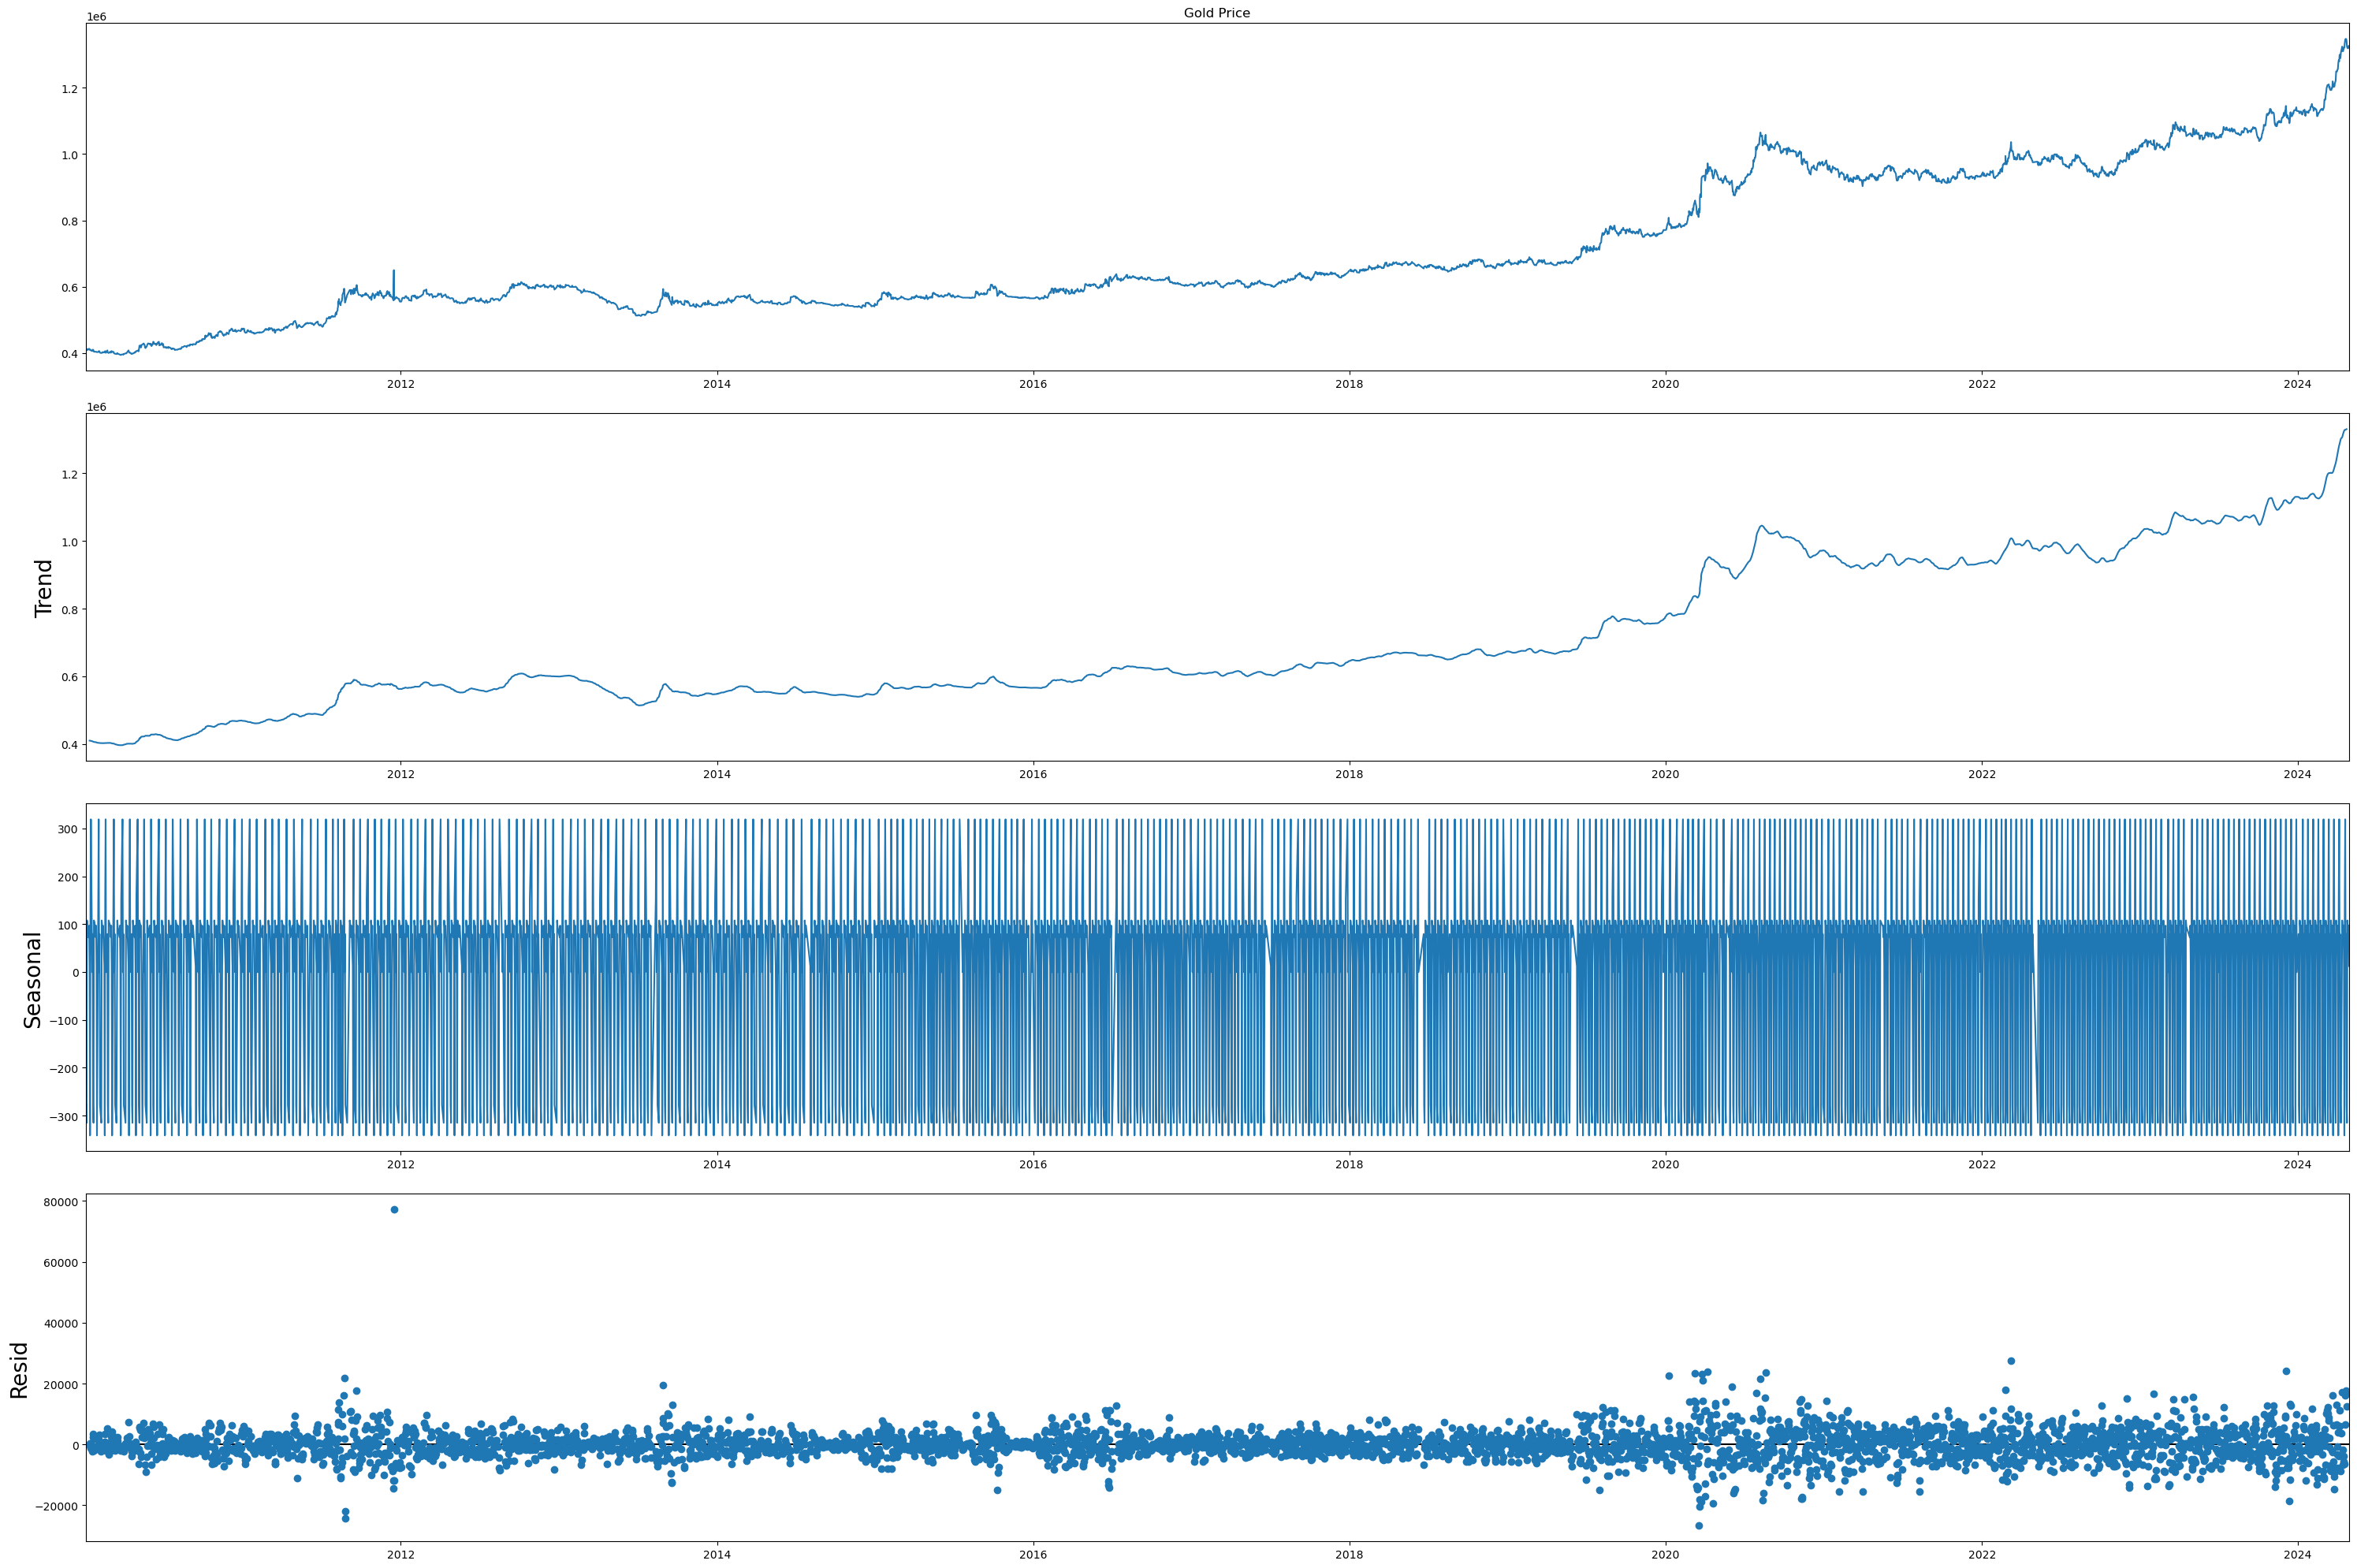

In [291]:
decomposition = seasonal_decompose(data2['Gold Price'], model='additive', period=12)
decomposition.plot()
plt.show()

In [292]:
# lets create time series from goldprice 
timeSeries = data.loc[:, ["Date","Gold Price"]]
timeSeries.index = timeSeries.Date
ts = timeSeries.drop("Date",axis=1)

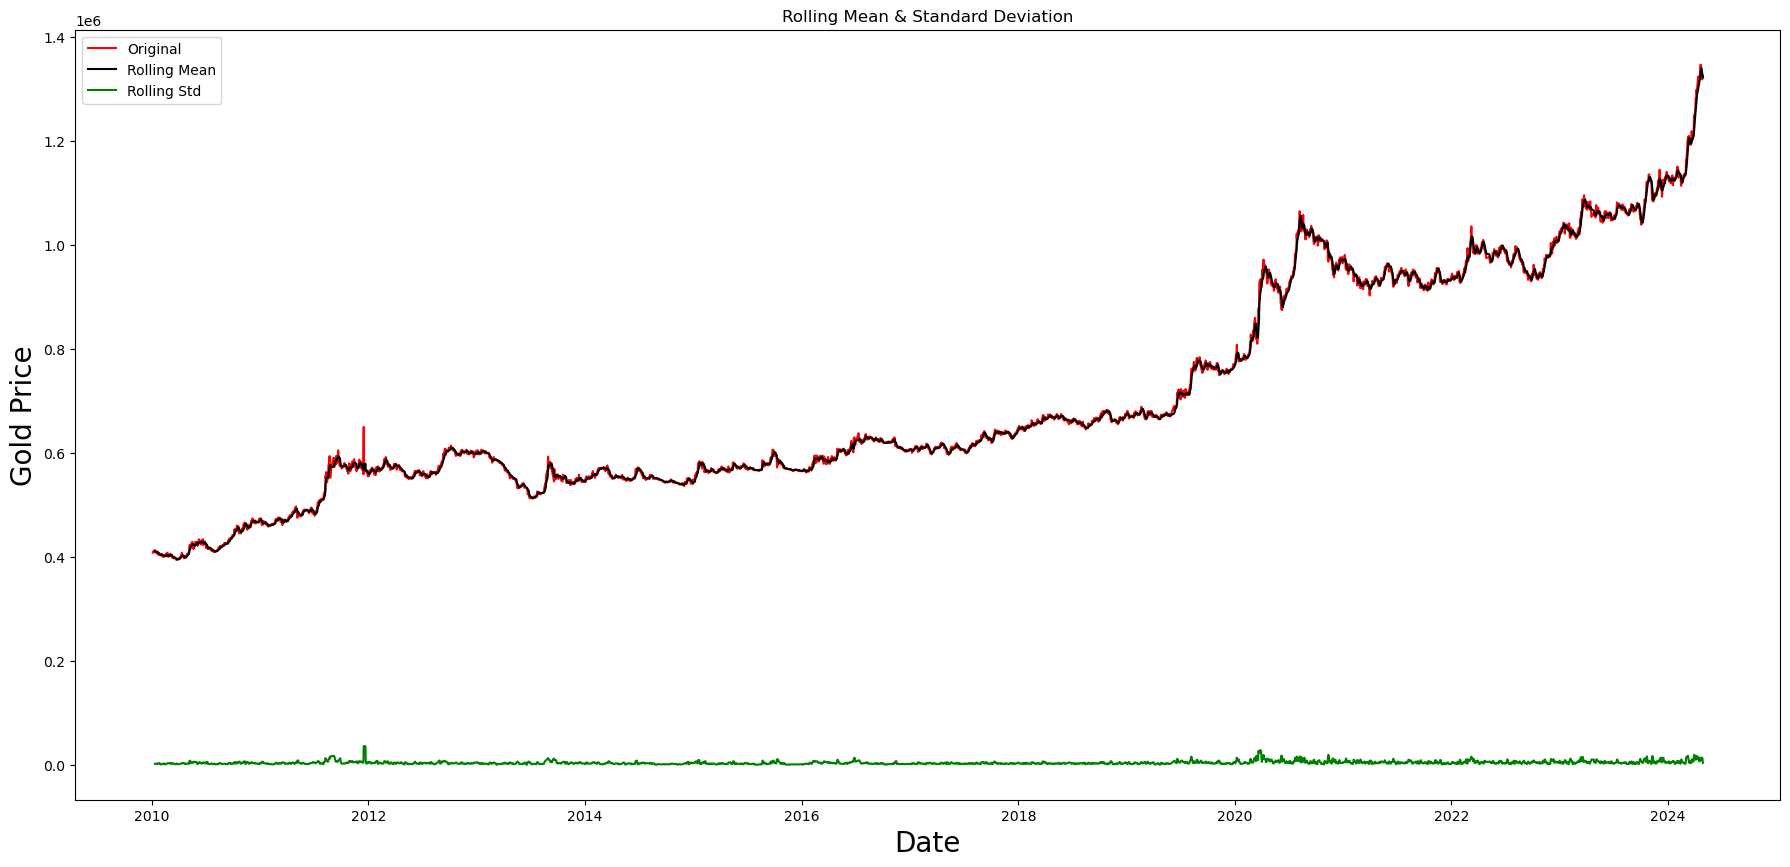

Test statistic:  1.2047309094185048
p-value:  0.9960184068213621
Critical Values: {'1%': -3.431899438634489, '5%': -2.8622246566066702, '10%': -2.567134448299063}


In [293]:
# adfuller library 
from statsmodels.tsa.stattools import adfuller
# check_adfuller
def check_adfuller(ts):
    # Dickey-Fuller test
    result = adfuller(ts, autolag='AIC')
    print('Test statistic: ' , result[0])
    print('p-value: '  ,result[1])
    print('Critical Values:' ,result[4])
# check_mean_std
def check_mean_std(ts):
    # Rolling statistics
    rolmean = ts.rolling(window=6).mean()
    rolstd = ts.rolling(window=6).std()
    
    # Plotting
    plt.figure(figsize=(22, 10))   
    orig = plt.plot(ts, color='red',label='Original')
    mean = plt.plot(rolmean, color='black', label='Rolling Mean')
    std = plt.plot(rolstd, color='green', label='Rolling Std')
    plt.xlabel("Date")
    plt.ylabel("Gold Price")
    plt.title('Rolling Mean & Standard Deviation')
    plt.legend()
    plt.show()

# check stationary: mean, variance(std), and adfuller test
check_mean_std(ts)
check_adfuller(ts)
